In [30]:
import ast
import pandas as pd
from statsbombpy import sb
from mplsoccer import VerticalPitch,Pitch

In [31]:
events_df = sb.competition_events(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

In [32]:
frames_df = sb.competition_frames(
country="Germany",
division="1. Bundesliga",
season="2023/2024",
gender="male")

In [33]:
frames_df.rename(columns={'event_uuid': 'id'}, inplace = True)
df=pd.merge(frames_df, events_df,
how="left", on=["match_id","id"])

In [34]:
passes = df[(df['type'] == 'Pass') & (df['team'] == 'Bayer Leverkusen')].copy()

In [35]:
passes[['x', 'y']] = passes['location_x'].apply(pd.Series)

### Available Matches

In [36]:
matches_df = df[['match_id', 'team']].drop_duplicates()
matches_summary = matches_df.groupby('match_id')['team'].unique().reset_index()
matches_summary

,match_id,team
0,3895052,"[RB Leipzig, Bayer Leverkusen]"
1,3895060,"[Borussia Mönchengladbach, Bayer Leverkusen]"
2,3895067,"[Darmstadt 98, Bayer Leverkusen]"
3,3895074,"[Bayer Leverkusen, Bayern Munich]"
4,3895086,"[FC Heidenheim, Bayer Leverkusen]"
5,3895095,"[Bayer Leverkusen, FSV Mainz 05]"
6,3895107,"[FC Köln, Bayer Leverkusen]"
7,3895113,"[Bayer Leverkusen, Wolfsburg]"
8,3895121,"[Bayer Leverkusen, Freiburg]"
9,3895134,"[Hoffenheim, Bayer Leverkusen]"


In [40]:
match_id_escolhido = 3895232
passes_jogo = passes[passes['match_id'] == match_id_escolhido]

In [41]:
# Only successful passes for Florian Wirtz
passes_wirtz = passes_jogo[passes_jogo['player'] == 'Florian Wirtz']
passes_wirtz = passes_wirtz[passes_wirtz['pass_outcome'].isnull()]

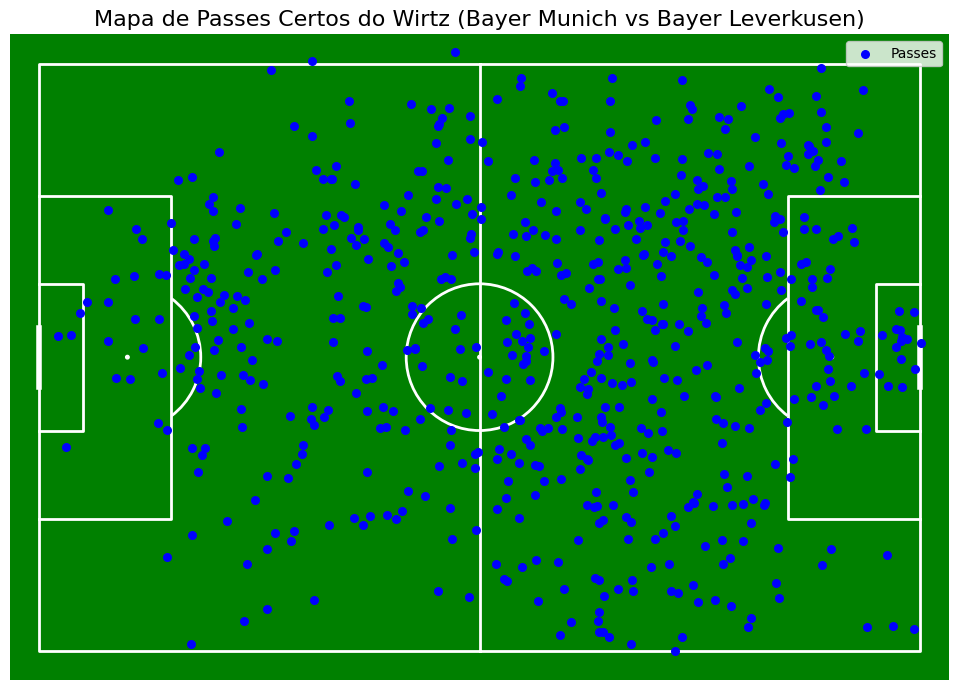

In [44]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='green', line_color='white')
fig, ax = pitch.draw(figsize=(11, 7))
pitch.scatter(passes_wirtz['x'], passes_wirtz['y'], ax=ax, s=30, color='blue', label='Passes')

ax.set_title(f'Mapa de Passes Certos do Wirtz (Bayer Munich vs Bayer Leverkusen)', fontsize=16)
ax.legend()

fig.tight_layout()